In [ ]:
#description: smart chatbot read articles and answer

In [6]:
!pip install nltk

In [5]:
!pip install newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 61.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13540 sha256=cbd67fb3bae3b62c5e18618508496fdc02d87b74ec2996b5b622781194a328c1
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3339 sha256=b67d5bc69f628b7c505303dee83f2dc88e7e338a73ccfaa300ac13727290541a
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1b

In [7]:
#Import the libraries
from newspaper import Article
import random
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Download package punkt
nltk.download('punkt', quiet=True)

True

In [ ]:
#Get articles
article1 = Article('https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444')
article1.download()
article1.parse()
article1.nlp()
corpus1 = article1.text

In [ ]:
#Print articles
print(corpus1)

Overview

Diabetes mellitus refers to a group of diseases that affect how the body uses blood sugar (glucose). Glucose is an important source of energy for the cells that make up the muscles and tissues. It's also the brain's main source of fuel.

The main cause of diabetes varies by type. But no matter what type of diabetes you have, it can lead to excess sugar in the blood. Too much sugar in the blood can lead to serious health problems.

Chronic diabetes conditions include type 1 diabetes and type 2 diabetes. Potentially reversible diabetes conditions include prediabetes and gestational diabetes. Prediabetes happens when blood sugar levels are higher than normal. But the blood sugar levels aren't high enough to be called diabetes. And prediabetes can lead to diabetes unless steps are taken to prevent it. Gestational diabetes happens during pregnancy. But it may go away after the baby is born.

Products & Services A Book: The Essential Diabetes Book

Symptoms

Diabetes symptoms depen

In [ ]:
#Tokenization break down sentences?
text1 = corpus1
sentence_list = nltk.sent_tokenize(text1) # A list of sentences

In [ ]:
#print list of sentences
print(sentence_list)

['Overview\n\nDiabetes mellitus refers to a group of diseases that affect how the body uses blood sugar (glucose).', 'Glucose is an important source of energy for the cells that make up the muscles and tissues.', "It's also the brain's main source of fuel.", 'The main cause of diabetes varies by type.', 'But no matter what type of diabetes you have, it can lead to excess sugar in the blood.', 'Too much sugar in the blood can lead to serious health problems.', 'Chronic diabetes conditions include type 1 diabetes and type 2 diabetes.', 'Potentially reversible diabetes conditions include prediabetes and gestational diabetes.', 'Prediabetes happens when blood sugar levels are higher than normal.', "But the blood sugar levels aren't high enough to be called diabetes.", 'And prediabetes can lead to diabetes unless steps are taken to prevent it.', 'Gestational diabetes happens during pregnancy.', 'But it may go away after the baby is born.', 'Products & Services A Book: The Essential Diabetes

In [ ]:
# function for greeting
def greeting_response(text):
  text = text.lower()
  #Bots greeting response
  bot_greetings = ['howdy','hi','hey', 'hello', 'hola']
  #Users greeting
  user_greetings = ['wassup','hi','hey', 'hello', 'greeting']
  for word in text.split():
    if word in user_greetings:
      return random.choice(bot_greetings)

In [ ]:
#Bring the most matching to the top, sort the most match index to the top
def index_sort(list_var):
  length = len(list_var)
  list_index = list(range(0,length))

  x = list_var
  for i in range(length):
    for j in range(length):
      if x[list_index[i]] > x[list_index[j]]:
        #swap
        temp = list_index[i]
        list_index[i] = list_index[j]
        list_index[j] = temp
  return list_index

In [ ]:
# bot response
def bot_response(user_input):
  user_input = user_input.lower()
  sentence_list.append(user_input)
  bot_response = ''
  cm = CountVectorizer().fit_transform(sentence_list)
  similarity_scores = cosine_similarity(cm[-1],cm)
  similarity_scores_list = similarity_scores.flatten()
  index = index_sort(similarity_scores_list)
  index = index[1:]
  response_flag = 0
  j = 0
  for i in range(len(index)):
    if similarity_scores_list[index[i]] > 0.0:
      bot_response = bot_response+' '+sentence_list[index[i]]
      response_flag = 1
      j = j + 1
    if j > 2:
      break
  if response_flag == 0:
    bot_response = bot_response+' '+"I apologize, I don't understand."
  sentence_list.remove(user_input)
  return bot_response

In [8]:
df = pd.read_csv("/content/diabetes.csv")

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='index'>

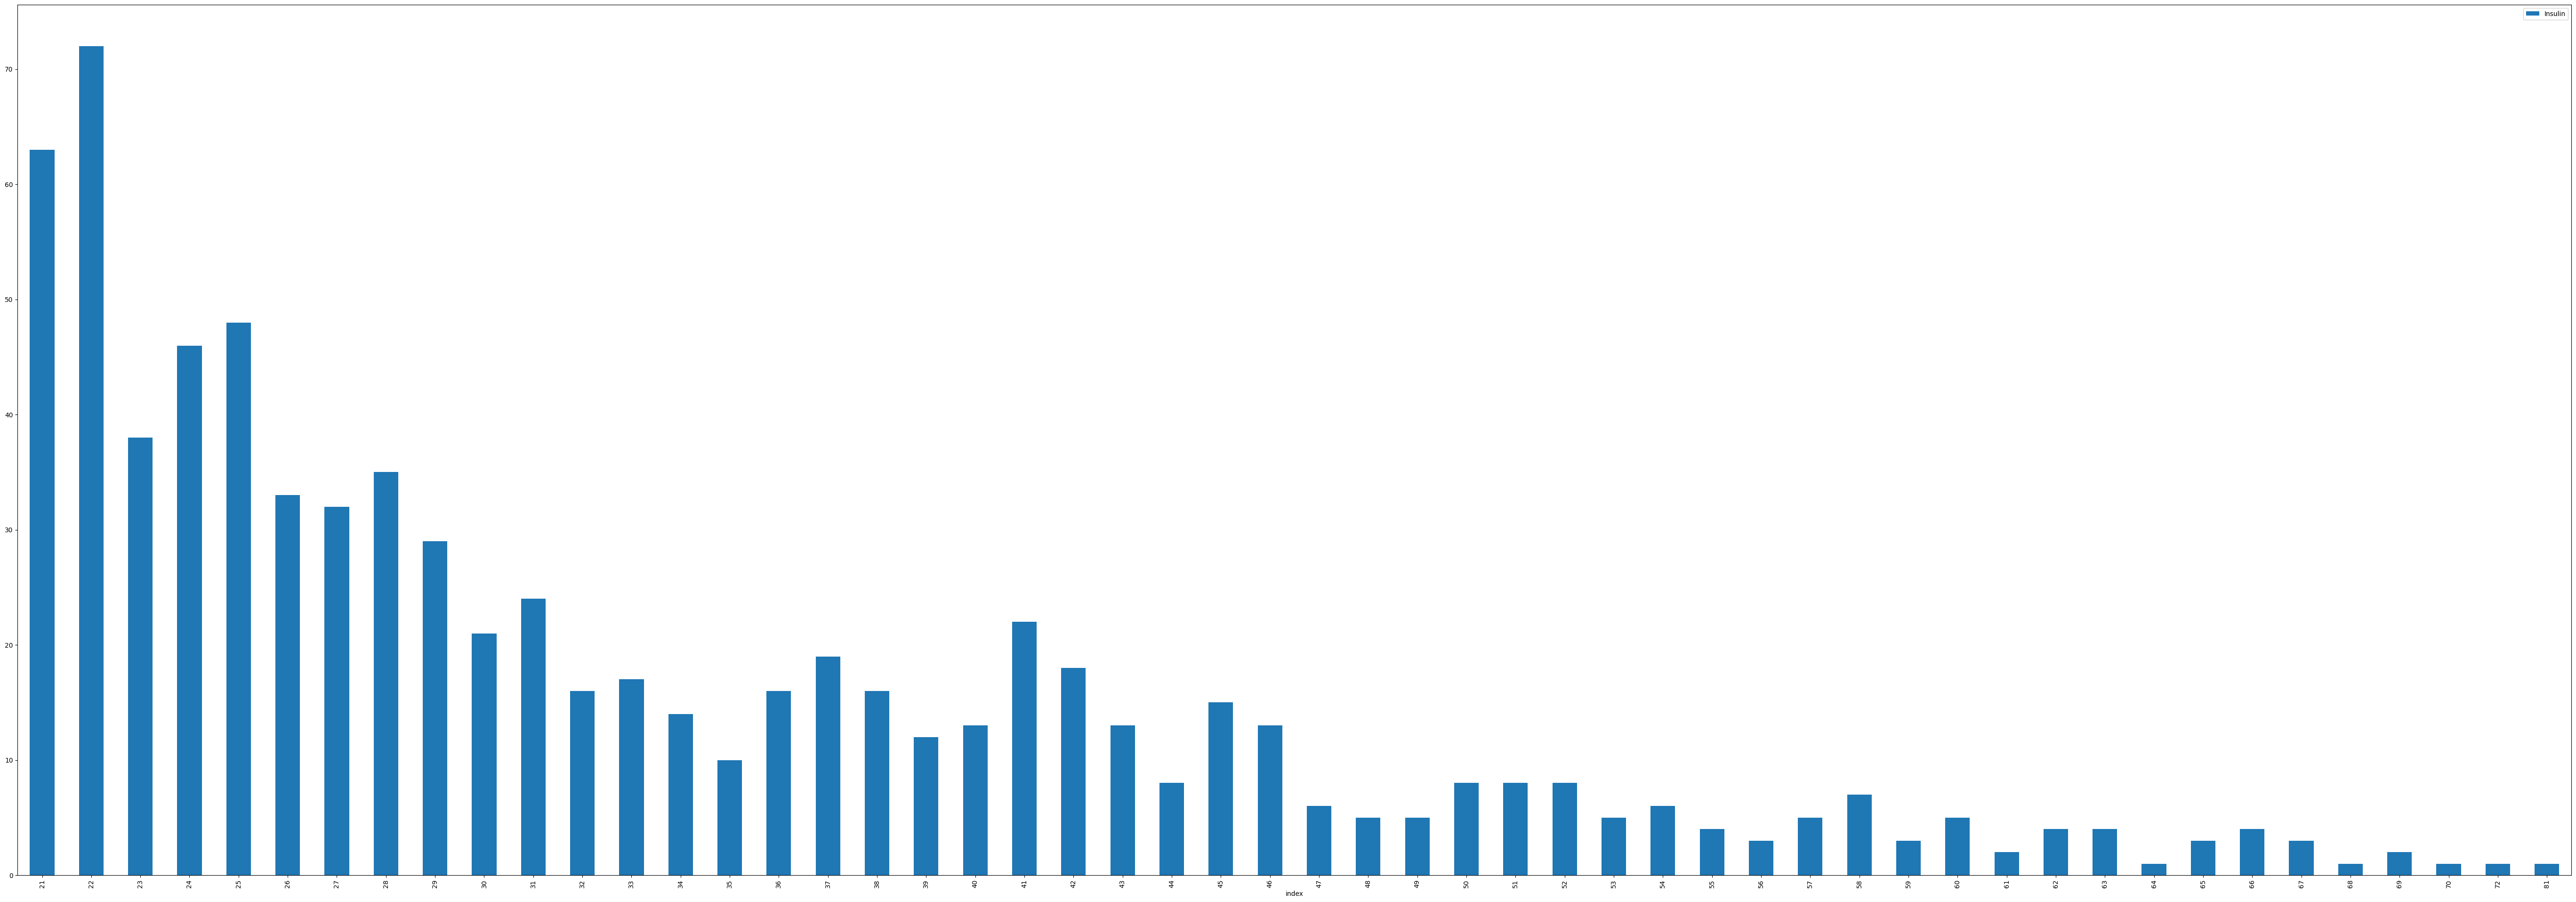

In [10]:
bar_df = df['Age'].value_counts().to_frame('Insulin').reset_index()
bar_df = bar_df.sort_values('index')
bar_df.plot.bar(x = 'index', figsize=(70,24))

In [ ]:
#start the chat
print('Doc Bot: I am Doc Bot, I can answer medical question, if you want to exit, please type bye.')
exit_list = ['exit', 'bye', 'quit']
while(True):
  user_input = input()
  if user_input.lower() in exit_list:
    print('Doc Bot: Chat with you later!')
    break
  else:
    if greeting_response(user_input) != None:
      print('Doc Bot: '+greeting_response(user_input))
    else:
      print('Doc Bot: '+bot_response(user_input))

Doc Bot: I am Doc Bot, I can answer medical question, if you want to exit, please type bye.
what is Diabetes?
Doc Bot:  But type 2 diabetes in children is increasing. Chronic diabetes conditions include type 1 diabetes and type 2 diabetes. Gestational diabetes.
what is the symptoms?
Doc Bot:  The earlier the condition is diagnosed, the sooner treatment can begin. The earlier the condition is diagnosed, the sooner treatment can begin. Products & Services A Book: The Essential Diabetes Book

Symptoms

Diabetes symptoms depend on how high your blood sugar is.
Symptoms
Doc Bot:  Products & Services A Book: The Essential Diabetes Book

Symptoms

Diabetes symptoms depend on how high your blood sugar is. If you notice any possible diabetes symptoms, contact your health care provider. If you notice any possible diabetes symptoms, contact your health care provider.
Prevention
Doc Bot:  Prevention

Type 1 diabetes can't be prevented.


KeyboardInterrupt: ignored